<h1>TAREA 13</h1>
<h2>Sergio Alejandro Diaz Pinilla</h2>
<h2>Julian Camilo Mendez Corredor</h2>
<br>
<br>

<li>Implementar los metodods de clasificacion vistos en clase</li>

<h1 style="font-size:100%; background-color:rgba(70, 0, 700, 0.2); color:black; text-align:center; line-height : 30px;">
Visión de Máquina &#8212; F. Prieto </h1>

In [2]:
import cv2
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np
import time as t
print cv2.__version__
from scipy import signal
from scipy import misc
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import ast

3.2.0


In [3]:
training = """[[2.16336449e-01, 8.06259636e-03, 2.66835029e-04, 3.08080166e-04
,6.10442488e-08, 2.71470248e-05,-6.38443795e-08],
 [2.24277028e-01, 7.44027906e-03, 3.59688081e-04, 3.80507551e-04
,5.68611696e-08, 3.10515018e-05, 1.28774231e-07],
 [2.16990058e-01, 6.67924161e-03, 3.12687384e-04, 3.16085785e-04
,6.93920236e-08, 2.13379182e-05,-7.11300049e-08],
 [2.22029494e-01, 4.09905894e-03, 2.50730774e-04, 3.68878425e-04
,3.71029924e-08, 1.86387446e-05,-1.05870153e-07],
 [2.23753070e-01, 4.29740858e-03, 7.43275997e-04, 3.24075395e-04
, -1.25255006e-07, 7.91324037e-06,-9.80270656e-08],
 [2.28940958e-01, 3.33419740e-03, 4.72130057e-04, 4.38273789e-04
, -6.01409361e-08, 1.63756597e-05, 1.90077614e-07],
 [1.69744938e-01, 2.15815742e-03, 1.37836960e-04, 1.97996730e-06
,8.13926894e-12,-1.90858047e-08,-3.16803379e-11],
 [1.65607742e-01, 7.57147465e-04, 8.36461900e-05, 2.07442142e-06
,2.66224806e-11, 4.83921960e-08, 6.15857230e-12],
 [1.85524486e-01, 3.44110649e-03, 1.93932002e-05, 7.46807179e-06
, -7.13809393e-11,-3.98455486e-07, 5.46097398e-11],
 [1.69926388e-01, 2.56557585e-03, 5.81100462e-05, 1.39828334e-06
,8.37381966e-12, 1.73207670e-08,-9.42057690e-12],
 [1.77557611e-01, 4.40868722e-03, 2.57859702e-04, 1.09720686e-05
,4.97419642e-10, 5.44514390e-07, 3.05249298e-10],
 [1.67193271e-01, 1.90295558e-03, 6.45973898e-05, 1.16949119e-06
,3.03642073e-12, 8.00878165e-09, 9.70078595e-12],
 [2.20412994e-01, 1.59354560e-02, 3.69338245e-03, 1.35264341e-03
,2.99119896e-06, 1.65812542e-04,-4.39680776e-07],
 [2.50662702e-01, 2.81535833e-02, 6.94344131e-03, 2.69131200e-03
,1.16332229e-05, 4.51516501e-04, 1.44294666e-07],
 [2.42708479e-01, 2.50133076e-02, 3.79865341e-03, 1.70043134e-03
,4.30921985e-06, 2.68906491e-04, 3.28051722e-07],
 [3.54936037e-01, 9.06646333e-02, 5.00546248e-03, 7.44842960e-04
,3.41851875e-07,-6.03082304e-05, 1.39698087e-06],
 [3.15341450e-01, 5.88656405e-02, 8.78926662e-03, 3.15193442e-03
,1.60876493e-05, 5.31236200e-04,-4.05094834e-06],
 [2.18552286e-01, 1.55507921e-02, 3.20614247e-03, 1.32240356e-03
,2.71030849e-06, 1.58112398e-04, 2.61931106e-07],
 [2.36737235e-01, 5.53886286e-03, 2.10963082e-03, 8.96605987e-04
, -7.34890210e-09, 6.63368114e-05,-1.23309907e-06],
 [2.28710642e-01, 9.62582633e-03, 1.32375653e-03, 8.56619872e-04
,7.17354761e-07, 8.40436411e-05, 5.63468237e-07],
 [2.58978044e-01, 1.44193634e-02, 2.00665102e-03, 1.99138576e-03
,3.39947615e-06, 2.24862873e-04, 2.07128773e-06],
 [2.71706965e-01, 2.64966275e-02, 3.29578855e-03, 2.06938965e-03
,5.25035032e-06, 2.97201101e-04, 1.28092482e-06],
 [2.53937843e-01, 1.88344317e-02, 1.97143872e-03, 1.46612891e-03
,2.23375815e-06, 1.90013353e-04,-1.10602965e-06],
 [3.50599338e-01, 7.73344377e-02, 6.00752375e-04, 1.34710655e-05
,9.39887038e-10,-3.46398227e-06, 7.64986908e-10],
 [1.95954083e-01, 1.19293474e-02, 8.91580990e-05, 8.54505046e-06
,1.93403961e-10, 7.21491342e-07,-1.34997588e-10],
 [1.99701216e-01, 1.18422228e-02, 9.12300186e-04, 1.10907503e-04
,3.50641491e-08, 1.20514639e-05, 3.88315854e-09],
 [2.45025727e-01, 1.75783072e-02, 1.77599570e-03, 6.47778152e-04
,6.17971447e-07, 8.07105838e-05,-3.17584069e-07],
 [2.56962737e-01, 3.30672803e-02, 1.09131447e-03, 7.73690531e-05
, -1.27721954e-08,-1.25285885e-05,-1.85010879e-08],
 [1.74686203e-01, 3.96250754e-03, 9.44910260e-05, 4.52294924e-06
, -9.33610660e-11,-2.66160546e-07, 5.15899927e-12],
 [1.84275871e-01, 4.12013577e-03, 6.38275811e-04, 1.21120246e-04
,3.32934490e-08, 7.71131521e-06,-5.06608728e-09]]"""

test="""[[2.21524081e-01, 3.36039460e-03, 7.49465778e-04, 3.77694914e-04
,1.24798118e-08, 1.82150181e-05, 2.00561916e-07],
 [2.13806848e-01, 5.46422299e-03, 4.04720966e-04, 2.81315655e-04
,3.54808957e-08, 2.07697778e-05, 8.80418522e-08],
 [2.16624655e-01, 9.42604371e-03, 1.47299585e-04, 2.10055958e-04
,1.24631803e-08, 2.03862859e-05,-3.47836366e-08],
 [3.07650349e-01, 4.57447790e-02, 3.73611964e-03, 2.53132528e-04
,2.44619651e-07, 5.09433345e-05, 2.75701414e-08],
 [2.56742866e-01, 1.83647693e-02, 1.79195796e-03, 4.41331985e-05
,4.87007976e-09, 4.88036715e-06,-1.14157330e-08],
 [1.77705187e-01, 4.06096483e-03, 2.02344447e-04, 5.89184448e-06
, -1.79484306e-10,-3.75459829e-07, 9.57631948e-11],
 [1.75060513e-01, 4.12280886e-03, 2.41857341e-04, 6.76338824e-06
, -1.38095220e-10,-2.84339241e-07,-2.36126361e-10],
 [2.65932491e-01, 3.71177798e-02, 3.47338224e-03, 8.59399086e-04
,1.30944061e-06, 1.25322047e-04,-7.00002173e-07],
 [2.20695383e-01, 1.79076344e-02, 1.66645202e-03, 2.74587228e-04
,1.49315233e-07, 2.50297875e-05, 1.10481357e-07],
 [1.74494446e-01, 4.42953731e-03, 7.64291222e-05, 3.00519045e-06
, -2.48271520e-11,-1.29215572e-07,-3.81828273e-11],
 [2.96008259e-01, 4.31736785e-02, 3.82693455e-04, 6.71719557e-04
,1.01013367e-07, 1.38528845e-04,-3.25245786e-07],
 [2.35008816e-01, 1.29349913e-02, 1.95131924e-03, 8.87766623e-04
,1.10799467e-06, 9.46627503e-05, 3.70995110e-07],
 [2.52032541e-01, 6.67878280e-03, 6.00884552e-03, 2.67098636e-03
,8.06326357e-06, 2.08478702e-04, 7.03448145e-06],
 [1.86853830e-01, 7.35604863e-03, 4.84476442e-04, 4.16392210e-05
,5.24904520e-09, 3.15465870e-06,-2.72476697e-09],
 [1.87023983e-01, 6.27875406e-03, 7.65676075e-04, 4.45676620e-05
,7.90554435e-09, 3.50618175e-06, 2.29844458e-09]]"""

training = ast.literal_eval(training)
test = ast.literal_eval(test)
print len(training)
print len(test)

30
15


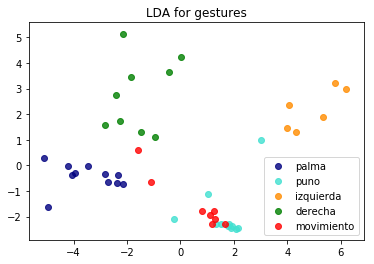

In [4]:
ones= np.ones(6)
resTraining = np.array(np.concatenate((ones*0,ones*1,ones*2,ones*3,ones*4)))
resTest = np.array([0,0,0,0,0,1,1,1,1,1,3,3,3,4,4])
res=np.concatenate((resTraining,resTest))
target_names = ["palma","puno","izquierda","derecha","movimiento"]
lda = LinearDiscriminantAnalysis(n_components=2)
dataLda = lda.fit(np.concatenate((training,test)), res).transform(np.concatenate((training,test)))
plt.figure()
colors = ['navy', 'turquoise', 'darkorange','green','red']
lw = 2   
for color, i, target_name in zip(colors, [0, 1, 2,3,4], target_names):
    plt.scatter(dataLda[res == i, 0], dataLda[res == i, 1], alpha=.8, color=color,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('LDA for gestures')
plt.show()


In [5]:
def compare(pred,sol):
    hits=0
    miss=0
    for i in range(len(pred)):
        if(pred[i]==sol[i]):
            hits+=1.0
        else:
            miss+=1.0
    print "prediccion: "+str(np.uint8(pred))
    print "solucion  : "+str(sol)
    print "aciertos: "+str(hits)
    print "fallos: "+str(miss)
    print "efectividad: "+ str(np.float32(hits/(miss+hits)))
    print ""
        
classifier=cv2.ml.NormalBayesClassifier_create()
sampleTraining= np.array(dataLda[:30], dtype=np.float32)
sampleTest= np.array(dataLda[30:], dtype=np.float32)
resTraining = np.array(resTraining, dtype=np.int32)
classifier.train(sampleTraining,cv2.ml.ROW_SAMPLE,resTraining)
predNBCTraining= classifier.predictProb(sampleTraining)[1].flatten()
predNBCTest= classifier.predictProb(sampleTest)[1].flatten()
print "BAYES"
print "--------------------------------"
print "Para el mismo conjunto de datos:"
compare(predNBCTraining,resTraining)

print "Para los datos de prueba:"
compare(predNBCTest,resTest)


BAYES
--------------------------------
Para el mismo conjunto de datos:
prediccion: [0 0 0 0 0 0 1 1 1 1 1 1 2 2 2 2 2 2 3 3 3 3 3 3 4 4 4 4 1 4]
solucion  : [0 0 0 0 0 0 1 1 1 1 1 1 2 2 2 2 2 2 3 3 3 3 3 3 4 4 4 4 4 4]
aciertos: 29.0
fallos: 1.0
efectividad: 0.966667

Para los datos de prueba:
prediccion: [0 0 0 0 3 1 1 2 4 4 3 3 3 4 1]
solucion  : [0 0 0 0 0 1 1 1 1 1 3 3 3 4 4]
aciertos: 10.0
fallos: 5.0
efectividad: 0.666667



In [6]:
import operator

def bayes_classifier(x_vec, kdes):
    """
    Classifies an input sample into class w_j determined by
    maximizing the class conditional probability for p(x|w_j).

    Keyword arguments:
        x_vec: A dx1 dimensional numpy array representing the sample.
        kdes: List of the gausssian_kde (kernel density) estimates

    Returns a tuple ( p(x|w_j)_value, class label ).

    """
    p_vals = []
    for kde in kdes:
        p_vals.append(kde.evaluate(x_vec))
    
    max_index, max_value = max(enumerate(p_vals), key=operator.itemgetter(1))
    return (max_value, max_index + 1)


from scipy.stats import kde
training_ans = [0,0,0,0,0,0,1,1,1,1,1,1,2,2,2,2,2,2,3,3,3,3,3,3,4,4,4,4,4]
copy = np.array(training)

itemindex,  = np.where(np.array(training_ans) == 0)
class1_kde = kde.gaussian_kde(copy[np.array(itemindex)].T,
        bw_method='scott')
itemindex,  = np.where(np.array(training_ans) == 1)
class2_kde = kde.gaussian_kde(copy[np.array(itemindex)].T,
        bw_method='scott')
itemindex,  = np.where(np.array(training_ans) == 2)
class3_kde = kde.gaussian_kde(copy[np.array(itemindex)].T,
        bw_method='scott')
itemindex,  = np.where(np.array(training_ans) == 3)
class4_kde = kde.gaussian_kde(copy[np.array(itemindex)].T,
        bw_method='scott')
itemindex,  = np.where(np.array(training_ans) == 4)
class5_kde = kde.gaussian_kde(copy[np.array(itemindex)].T,
        bw_method='scott')

/Users/sergiodiazpinilla/anaconda/lib/python2.7/site-packages/scipy/stats/kde.py:513: RuntimeWarning: invalid value encountered in sqrt
  self._norm_factor = sqrt(linalg.det(2*pi*self.covariance)) * self.n


In [10]:
def empirical_error(data_set, classes, classifier_func, classifier_func_args):
    """
    Keyword arguments:
        data_set: 'n x d'- dimensional numpy array, class label in the last column.
        classes: List of the class labels.
        classifier_func: Function that returns the max argument from the discriminant function.
            evaluation and the class label as a tuple.
        classifier_func_args: List of arguments for the 'classifier_func'.
    
    Returns a tuple, consisting of a dictionary withthe classif. counts and the error.
    
    e.g., ( {1: {1: 321, 2: 5}, 2: {1: 0, 2: 317}}, 0.05)
    where keys are class labels, and values are sub-dicts counting for which class (key)
    how many samples where classified as such.
    
    """
    class_dict = {i:{j:0 for j in classes} for i in classes}
   
    for cl in classes:
        for row in data_set[data_set[:,-1] == cl][:,:-1]:
            g = classifier_func(row, *classifier_func_args)
            class_dict[cl][g[1]] += 1
    
    correct = 0
    for i in classes:
        correct += class_dict[i][i]
    
    misclass = data_set.shape[0] - correct
    return (class_dict, misclass / data_set.shape[0])
#print np.array([[0,0,0,0,0,1,1,1,1,1,3,3,3,4,4]]).T
test_cp = np.concatenate((test, np.array([[0,0,0,0,0,1,1,1,1,1,3,3,3,4,4]]).T), 1)

classification_dict, error = empirical_error(test_cp, [0,1,2,3,4], bayes_classifier, [[class1_kde, class2_kde, class4_kde,class5_kde]])
print "Ventana de Parzen"
print "----------------------------------"
print "|Training Data  |0|1|2|3|4|"
for k, v in classification_dict.iteritems():
    print "________________________________________"
    s = "|Clase(actual)"+str(k)+" |"
    for k1,v1 in v.iteritems():
        s +=str(v1) +"|"
    print s




Ventana de Parzen
----------------------------------
|Training Data  |0|1|2|3|4|
________________________________________
|Clase(actual)0 |0|3|0|0|2|
________________________________________
|Clase(actual)1 |0|5|0|0|0|
________________________________________
|Clase(actual)2 |0|0|0|0|0|
________________________________________
|Clase(actual)3 |0|3|0|0|0|
________________________________________
|Clase(actual)4 |0|2|0|0|0|


In [9]:
knn = cv2.ml.KNearest_create()
knn.train(sampleTraining,cv2.ml.ROW_SAMPLE,resTraining)
predKNNTraining= knn.findNearest(sampleTraining,3)[1].flatten()
predKNNTest= knn.findNearest(sampleTest,3)[1].flatten()
print "K Vecinos"
print "-------------------------------------"
print "Para el mismo conjunto de datos:"
compare(predKNNTraining,resTraining)

print "Para los datos de prueba:"
compare(predKNNTest,resTest)

K Vecinos
-------------------------------------
Para el mismo conjunto de datos:
prediccion: [0 0 0 0 0 0 1 1 4 1 1 1 2 2 2 2 2 2 3 3 3 3 3 3 4 4 0 4 1 4]
solucion  : [0 0 0 0 0 0 1 1 1 1 1 1 2 2 2 2 2 2 3 3 3 3 3 3 4 4 4 4 4 4]
aciertos: 27.0
fallos: 3.0
efectividad: 0.9

Para los datos de prueba:
prediccion: [0 0 0 0 0 4 1 2 4 1 3 3 3 4 4]
solucion  : [0 0 0 0 0 1 1 1 1 1 3 3 3 4 4]
aciertos: 12.0
fallos: 3.0
efectividad: 0.8

